# Dicionário de features engineering

### Importando as bibliotecas

In [1]:
import sys # Importando a biblioteca para acessar os níveis de pastas
from IPython.display import Image, display # Importando a biblioteca para exibir imagens em Python
sys.path.append('..') # Voltando um nível nas pastas do projeto para importar as funções e variáveis 
import params.consts as consts # Importando o pacote/biblioteca com as constantes do projeto

## Pré Processamento dos Dados

### One Hot Enconder

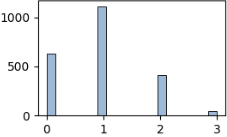

In [2]:
display(Image(consts.ONE_HOT_ENCODER, width=300)) # Exibindo o gráfico

O **One Hot Encoder** é uma técnica usada para converter variáveis categóricas em uma forma numérica compreensível para algoritmos de aprendizado de máquina. Como a maioria dos modelos não lida bem com variáveis categóricas, é necessário convertê-las em uma representação numérica. O problema com simplesmente atribuir números inteiros às categorias é que isso poderia sugerir uma relação ordinal entre elas, mesmo quando essa relação não existe.

**Como funciona:**

Se você tem uma variável categórica com n categorias, o One Hot Encoder criará n colunas binárias (valores 0 ou 1). Cada coluna corresponderá a uma das categorias, e um valor 1 será atribuído à coluna que representa a categoria presente naquele registro, enquanto as outras colunas terão valor 0.


**Exemplo:**

Se tivermos uma coluna chamada "Cor" com as categorias ['Vermelho', 'Azul', 'Verde'], o One Hot Encoder as transformaria em três colunas:

| Cor      | Vermelho | Azul | Verde |
|----------|----------|------|-------|
| Vermelho | 1        | 0    | 0     |
| Azul     | 0        | 1    | 0     |
| Verde    | 0        | 0    | 1     |

Essa abordagem evita que o modelo entenda que uma categoria tem maior peso ou ordem sobre outra, algo que ocorreria com um simples mapeamento numérico.

**Quando usar:**

- Para variáveis categóricas nominais (sem ordem), como cores, tipos de produtos, etc.
- Quando o número de categorias não é muito grande, pois o One Hot Encoding aumenta significativamente o número de colunas.
- Pode ser utilizado para números discretos que representam categorias, como códigos de regiões ou setores, onde os valores numéricos não têm significado ordinal (não há relação de ordem entre os números). Neste caso, o One Hot Encoder garante que o modelo não trate os valores como sequenciais ou com importância relativa.

### Standard Scaler

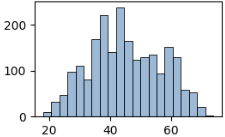

In [3]:
display(Image(consts.STANDARD_SCALER, width=300)) # Exibindo o gráfico

O **Standard Scaler** é uma técnica de normalização que transforma os dados para que tenham uma distribuição com média igual a 0 e desvio padrão igual a 1. Isso é feito subtraindo a média de cada valor e dividindo pelo desvio padrão da variável. Ele assume que os dados seguem uma distribuição normal ou aproximadamente normal.

**Exemplo:**

Se você tem uma variável de idade com média de 40 anos e desvio padrão de 15, a idade de 55 anos seria escalada assim:

Z = (55-40)/15 = 1

Isso significa que 55 anos está a uma unidade de desvio padrão acima da média.

**Quando usar:**

- Quando os dados seguem uma distribuição normal ou quando você deseja centralizar os dados.
- Modelos sensíveis à escala, como regressão logística, SVM, KNN e redes neurais, se beneficiam dessa técnica.

### Power Transformation

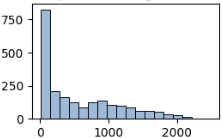

In [4]:
display(Image(consts.POWER_TRANSFORMATION, width=300)) # Exibindo o gráfico

O **Power Transformation** é uma técnica para transformar variáveis não normalmente distribuídas em uma forma mais próxima de uma distribuição normal. Esse método é útil para estabilizar a variância, corrigir a assimetria (skewness) e tornar os dados mais adequados para algoritmos que assumem uma distribuição normal dos dados.

**Tipos de Power Transformation:**
- Box-Cox Transformation: Aplica uma transformação paramétrica baseada em um parâmetro λ. É aplicável apenas a dados positivos.
- Yeo-Johnson Transformation: Similar ao Box-Cox, mas pode lidar com valores negativos ou zero.

**Exemplo:**

Se tivermos uma variável com alta assimetria à direita, o Power Transformation pode suavizar a cauda longa e trazer os dados para uma distribuição mais simétrica.

**Quando usar:**

- Para tratar variáveis com assimetria acentuada.
- Para estabilizar a variância, especialmente em regressões lineares e outros modelos baseados em suposições de normalidade.

### Min-Max Scaler

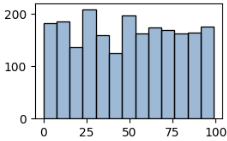

In [5]:
display(Image(consts.MIN_MAX_SCALER, width=300)) # Exibindo o gráfico

O **Min-Max Scaler** transforma os dados para que todos os valores estejam dentro de um intervalo específico, normalmente entre 0 e 1. Essa técnica reescala os dados linearmente com base no valor mínimo e máximo da variável.

**Exemplo:**

Se a sua variável de idade vai de 18 a 80, a idade de 40 seria transformada da seguinte maneira:

X = (40-18)/(80-18) = 0,355

Isso coloca o valor da idade no intervalo entre 0 e 1.

**Quando usar:**

- Quando você sabe que os dados têm uma distribuição uniforme ou quando os valores têm limites fixos.
- Frequentemente usado em algoritmos baseados em distâncias, como KNN e Redes Neurais, já que esses algoritmos são sensíveis à escala dos dados.

### PCA

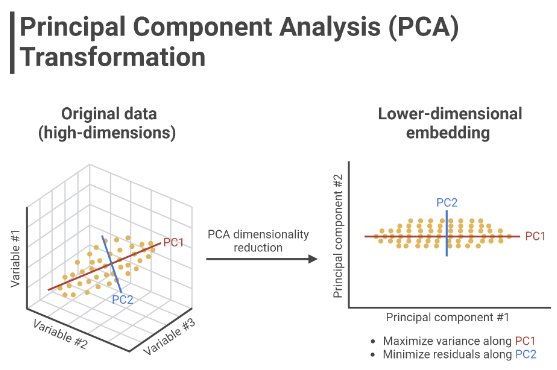

In [7]:
display(Image(consts.PCA, width=400)) # Exibindo o gráfico

O **PCA (Análise de Componentes Principais)** é uma técnica de redução de dimensionalidade que transforma um conjunto de variáveis possivelmente correlacionadas em um novo conjunto de variáveis não correlacionadas, chamadas de componentes principais. O objetivo do PCA é capturar a maior variabilidade dos dados com o menor número possível de componentes, facilitando a visualização, compressão e processamento dos dados.

Ao reduzir a dimensionalidade dos dados, o PCA elimina redundâncias e simplifica a estrutura dos dados, o que pode melhorar o desempenho de algoritmos de aprendizado de máquina, especialmente aqueles que sofrem com a "maldição da dimensionalidade" (dimensões excessivas tornam o processamento computacionalmente custoso e podem causar overfitting).

**Como funciona:**
- O PCA calcula os autovalores e autovetores da matriz de covariância dos dados para identificar as direções (componentes principais) que maximizam a variância dos dados.
- Os dados originais são projetados nesses novos eixos (componentes), e as componentes principais são ordenadas de acordo com a quantidade de variância que explicam. O primeiro componente explica a maior parte da variação, o segundo explica a maior parte da variação restante, e assim por diante.
- A dimensionalidade dos dados pode ser reduzida escolhendo um número de componentes principais que capturem uma alta porcentagem da variância total, sem perder muita informação.

**Exemplo:**
Imagine um conjunto de dados com duas variáveis fortemente correlacionadas, como peso e altura. O PCA identificaria que a maior parte da variabilidade nos dados pode ser explicada por um único componente principal, o qual representa uma combinação linear das duas variáveis. Isso permitiria a projeção desses dados em uma única dimensão, reduzindo de duas para uma.

**Quando usar:**

- Quando você tem dados com alta dimensionalidade e deseja reduzir o número de variáveis sem perder muita informação.
- Quando há correlação significativa entre as variáveis, o que pode causar redundância. O PCA elimina essa redundância projetando os dados em eixos ortogonais.
- Útil para visualização de dados multidimensionais em um espaço de 2D ou 3D.
- Pode ser utilizado para pré-processamento em modelos de aprendizado de máquina que são sensíveis a dados de alta dimensionalidade, como regressão linear, SVM e KNN, para evitar overfitting e reduzir o tempo de treinamento.
- Não deve ser usado quando as variáveis são interpretativamente importantes, pois o PCA combina e transforma as variáveis originais, dificultando a interpretação dos componentes principais.